In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [2]:
#Fetch Images count from Fodlers


In [3]:
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')


daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [4]:
#Load Images into Arrays as Dataset


In [5]:
base_dir = 'Images/'
img_size = 180
batch = 16


In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))


Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [7]:
flower_names = train_ds.class_names
flower_names


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [8]:
import matplotlib.pyplot as plt


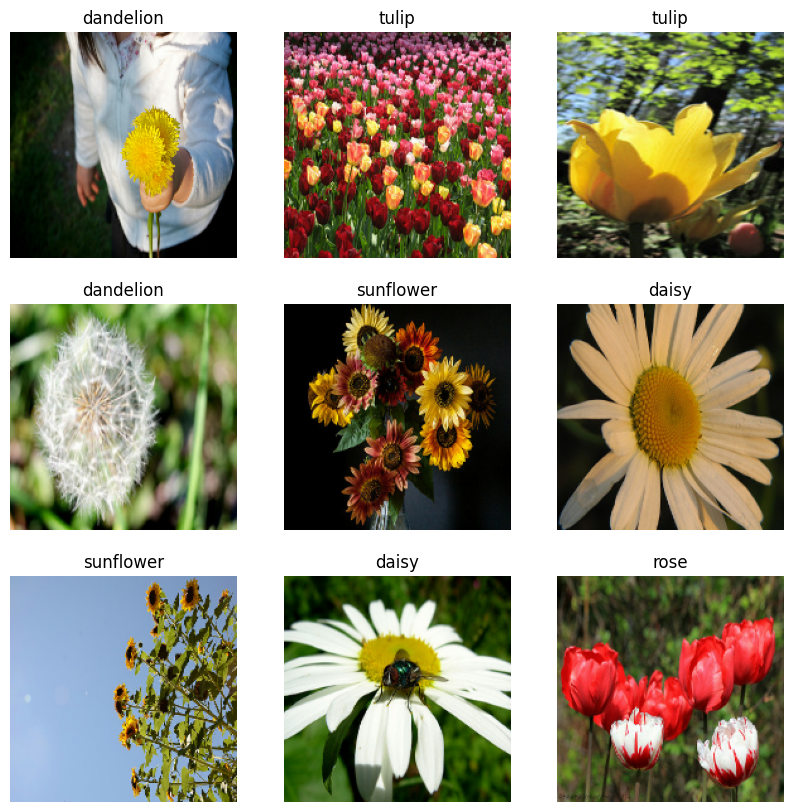

In [9]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [12]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [13]:
#Data Augmentation

In [14]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\meghr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


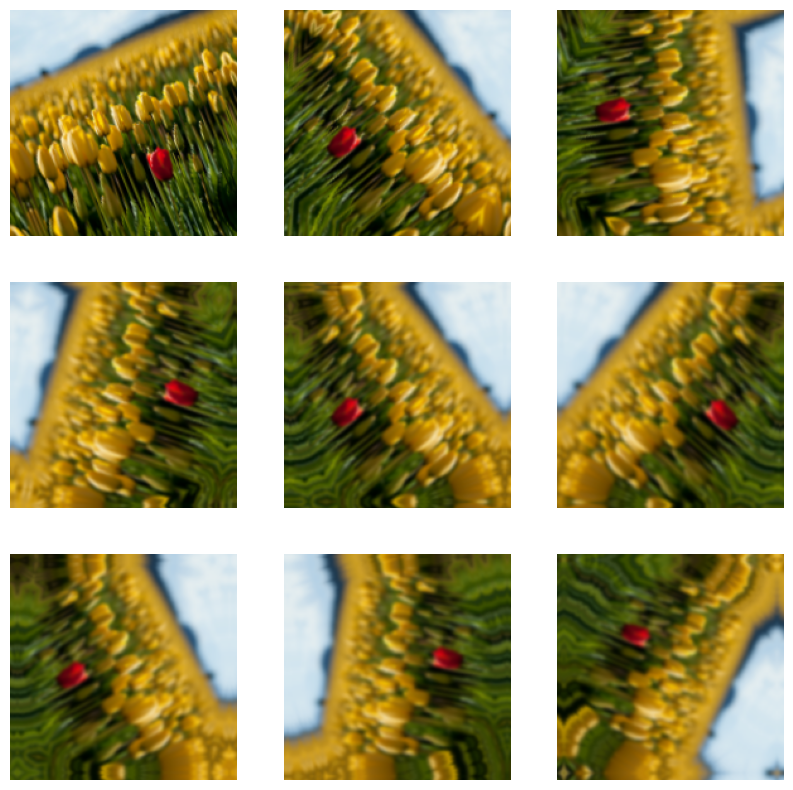

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [16]:
#Model Creation

In [17]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 159s 728ms/step - accuracy: 0.3834 - loss: 1.4097 - val_accuracy: 0.5214 - val_loss: 1.1695
Epoch 2/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 152s 705ms/step - accuracy: 0.5772 - loss: 1.0768 - val_accuracy: 0.6338 - val_loss: 0.9527
Epoch 3/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 150s 694ms/step - accuracy: 0.6214 - loss: 0.9494 - val_accuracy: 0.6524 - val_loss: 0.9010
Epoch 4/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 133s 616ms/step - accuracy: 0.6392 - loss: 0.9138 - val_accuracy: 0.6582 - val_loss: 0.8775
Epoch 5/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 107s 490ms/step - accuracy: 0.6794 - loss: 0.8436 - val_accuracy: 0.6883 - val_loss: 0.8452
Epoch 6/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 137s 638ms/step - accuracy: 0.7086 - loss: 0.7792 - val_accuracy: 0.6512 - val_loss: 0.8903
Epoch 7/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 145s 674ms/step - accuracy: 0.7077 - loss: 0.7574 - val_accuracy: 0.6698 - val_loss: 0.8771
Epoch 8/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 124s 576ms/step - accuracy: 0.7118 -

In [21]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [22]:
classify_images('Sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


'The Image belongs to rose with a score of 97.29332327842712'

In [23]:
model.save('Flower_Recog_Model.h5')